# Instructions:
## Please take these three data sets and with using Power BI answer the following question: 

# "Account managers want to know how their customers are doing and which parts should they be pushing more"

## Please use creative freedom in this and you are encouraged to create something to display your skills.

In [1]:
#Import packages

import sqlite3
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker  # Import ticker module for FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
# Load each sheet into a DataFrame
sales = pd.read_excel('Sales.xlsx', sheet_name='Data')
parts = pd.read_excel('Parts.xlsx', sheet_name='Parts')
customers = pd.read_excel('Customer_Details.xlsx', sheet_name='Customer')

In [3]:
# Perform SQL-like joins
merged_df = pd.merge(sales, customers, on='Customer_ Number', how='left')
merged_df = pd.merge(merged_df, parts, on='Product', how='left')

In [4]:
merged_df.head()

,Customer_ Number,Product,Date,Battery_Sales,Customer_Name,Customer_State,AccountManagerFirstName,AccountManagerLastName,Product_Category,AGM_Product
0,4008,SP-30,2018-01-01,0,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N
1,4008,SP-30,2018-01-02,23,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N
2,4008,SP-30,2018-01-03,28,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N
3,4008,SP-30,2018-01-04,36,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N
4,4008,SP-30,2018-01-05,42,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N


In [5]:
# Display basic information about the DataFrame
print("Rows     : ", merged_df.shape[0])
print("Columns  : ", merged_df.shape[1])
print("\nFeatures : \n", merged_df.columns.tolist())
print("\nData Types: \n", merged_df.dtypes)  # Adding data types here
print("\nMissing values :  ", merged_df.isnull().sum().values.sum())
print("\nUnique values :  \n", merged_df.nunique())

Rows     :  348230
Columns  :  10

Features : 
 ['Customer_ Number', 'Product', 'Date', 'Battery_Sales', 'Customer_Name', 'Customer_State', 'AccountManagerFirstName', 'AccountManagerLastName', 'Product_Category', 'AGM_Product']

Data Types: 
 Customer_ Number                    int64
Product                            object
Date                       datetime64[ns]
Battery_Sales                       int64
Customer_Name                      object
Customer_State                     object
AccountManagerFirstName            object
AccountManagerLastName             object
Product_Category                   object
AGM_Product                        object
dtype: object

Missing values :   0

Unique values :  
 Customer_ Number             40
Product                      22
Date                       1795
Battery_Sales               727
Customer_Name                40
Customer_State                9
AccountManagerFirstName       3
AccountManagerLastName        3
Product_Category         

## Transform Data
### Merge first and last name

In [6]:
# Concatenate first name and last name with a space in between
merged_df['Account_Manager'] = merged_df['AccountManagerFirstName'] + ' ' + merged_df['AccountManagerLastName']
merged_df.head()

,Customer_ Number,Product,Date,Battery_Sales,Customer_Name,Customer_State,AccountManagerFirstName,AccountManagerLastName,Product_Category,AGM_Product,Account_Manager
0,4008,SP-30,2018-01-01,0,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
1,4008,SP-30,2018-01-02,23,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
2,4008,SP-30,2018-01-03,28,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
3,4008,SP-30,2018-01-04,36,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
4,4008,SP-30,2018-01-05,42,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown


In [7]:
# Download the new dataframe

# File path where to save the Excel file
file_path = "merged_df.xlsx"

# Save the DataFrame as an Excel file
merged_df.to_excel(file_path, index=False)

print("Excel file saved successfully.")

Excel file saved successfully.


# Connect database

In [8]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the merged DataFrame to the database
merged_df.to_sql('merged_data', conn, index=False)

348230

# Exploratory Data Analysis

In [9]:
# Execute SQL query
query = pd.read_sql_query('SELECT * FROM merged_data', conn)

# View query: all data
query.head()

,Customer_ Number,Product,Date,Battery_Sales,Customer_Name,Customer_State,AccountManagerFirstName,AccountManagerLastName,Product_Category,AGM_Product,Account_Manager
0,4008,SP-30,2018-01-01 00:00:00,0,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
1,4008,SP-30,2018-01-02 00:00:00,23,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
2,4008,SP-30,2018-01-03 00:00:00,28,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
3,4008,SP-30,2018-01-04 00:00:00,36,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown
4,4008,SP-30,2018-01-05 00:00:00,42,Anaheim Lawn Care,CA,Jordan,Brown,LAWN & GARDEN,N,Jordan Brown


In [10]:
query1 = query1 = '''
    SELECT Account_Manager, 
           SUM(Battery_Sales) AS Total_Batteries 
    FROM merged_data 
    GROUP BY Account_Manager 
    UNION
    SELECT 'Total', 
           SUM(Battery_Sales) 
    FROM merged_data
'''
# Prepare query1: Total sales by employee
# Execute SQL query and read the result into a DataFrame
query_result = pd.read_sql_query(query1, conn)

# Convert Total_Batteries to numeric type
query_result['Total_Batteries'] = pd.to_numeric(query_result['Total_Batteries'], errors='coerce')

# Format numbers with commas
query_result['Total_Batteries'] = query_result['Total_Batteries'].apply(lambda x: "{:,}".format(x) if pd.notnull(x) else '')

# Display query2 pretty results
print(query_result)

   Account_Manager Total_Batteries
0    Alex Williams       3,049,542
1     Jordan Brown      14,307,157
2     Jordan Smith       5,289,635
3  Morgan Williams       2,501,310
4            Total      25,147,644


In [11]:
# Compare year over year
current_year = 2022
last_year = 2021

query2 = '''
    SELECT  
           SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) AS Sales_2022,
           SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END) AS Sales_2021,
           SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) - SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END) AS Sales_Difference,
           ROUND(100.0 * (SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) - SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END)) / NULLIF(SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END), 0), 1) AS Percentage_Change
    FROM merged_data 
    WHERE Date BETWEEN '2021-01-01' AND '2022-12-31'
    ORDER BY Sales_2022 DESC
'''

query_result1 = pd.read_sql_query(query2, conn)

# View query2
print(query_result1)

   Sales_2022  Sales_2021  Sales_Difference  Percentage_Change
0     5090538     5575682           -485144               -8.7


In [12]:
# Compare customer year over year
current_year = 2022
last_year = 2021

query2 = '''
    SELECT Customer_Name, 
           SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) AS Sales_2022,
           SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END) AS Sales_2021,
           SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) - SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END) AS Sales_Difference,
           ROUND(100.0 * (SUM(CASE WHEN strftime('%Y', Date) = '2022' THEN Battery_Sales ELSE 0 END) - SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END)) / NULLIF(SUM(CASE WHEN strftime('%Y', Date) = '2021' THEN Battery_Sales ELSE 0 END), 0), 1) AS Percentage_Change
    FROM merged_data 
    WHERE Date BETWEEN '2021-01-01' AND '2022-12-31'
    GROUP BY Customer_Name
    ORDER BY Sales_2022 DESC
'''

query_result1 = pd.read_sql_query(query2, conn)

# View query2
print(query_result1)

                   Customer_Name  Sales_2022  Sales_2021  Sales_Difference  \
0             Westminster Garage      555693      539634             16059   
1             Chula Vista Garage      515066      497111             17955   
2                 Chicago Garage      242184      287931            -45747   
3                 El Paso Garage      234963      281049            -46086   
4                 Norwalk Garage      222514      267475            -44961   
5             Los Angeles Garage      219582      263633            -44051   
6                   Bronx Garage      206888      246092            -39204   
7                 Houston Garage      201798      242550            -40752   
8                New York Garage      200569      240604            -40035   
9                    Katy Garage      190875      229813            -38938   
10  La Puente Public Golf Course      183199      188828             -5629   
11      Chino Public Golf Course      172792      178856        

In [13]:
# Query3: Total sales by state
query3 = '''
        SELECT Customer_State, SUM(Battery_Sales) AS Total_Sales 
        FROM merged_data 
        GROUP BY Customer_State
        ORDER BY Total_Sales DESC
        '''
# Execute SQL query and read the result into a DataFrame
query_result2 = pd.read_sql_query(query3, conn)
# View query3
print(query_result2)

  Customer_State  Total_Sales
0             CA      7677505
1             TX      5352870
2             NY      4629883
3             SC      2118607
4             IL      2078989
5             WI      1276782
6             PA       970553
7             OK       659752
8             SD       382703


In [14]:
# Query4: Total sales by Product
query4 = '''
        SELECT Product, SUM(Battery_Sales) AS Total_Sales 
        FROM merged_data 
        GROUP BY Product
        ORDER BY Total_Sales DESC
        '''
# Execute SQL query and read the result into a DataFrame
query_result3 = pd.read_sql_query(query4, conn)
# View query4
print(query_result3)

           Product  Total_Sales
0      31M-AGM-RAD      3736387
1           MTZ-34      2433967
2           MTZ-65      2433769
3        MTZ-48/H6      2431085
4          MTP-67R      1774233
5            MT-85      1770245
6           MT-58R      1768474
7            MT-35      1766507
8            SC34A      1539491
9          902HC-S       704145
10           921-S       694061
11           AGM4D       619854
12           AGM8D       615814
13       65-24FCOS       515148
14        65-35COS       514214
15         31-AGMX       470517
16      GC2XHC-UTL       334360
17       GC2-ECL-S       332139
18            N120       310612
19  9-GC2-UTLCOSNS       174894
20           SP-30       110066
21         7-31P7G        97662


In [15]:
# Query5 to calculate totals by year and month
# SQL query to calculate totals by year
query_year = '''
             SELECT 
                 strftime('%Y', Date) AS Year,
                 SUM(Battery_Sales) AS Total_Sales 
             FROM merged_data 
             GROUP BY Year
             '''

# SQL query to calculate totals by month
query_month = '''
              SELECT 
                  
                  strftime('%m', Date) AS Month,
                  SUM(Battery_Sales) AS Total_Sales 
              FROM merged_data 
              GROUP BY Month
              '''

# Combine the two queries using UNION
query5 = f"{query_year} UNION {query_month}"

# Apply ORDER BY after UNION
query5 += " ORDER BY Year, Month"

# Execute SQL query and read the result into a DataFrame
query_result4 = pd.read_sql_query(query5, conn)

# View query5
print(query_result4)

    Year  Total_Sales
0     01      2866342
1     02      2528200
2     03      2333835
3     04      1935682
4     05      1939168
5     06      1808290
6     07      1867653
7     08      1537406
8     09      1914650
9     10      2054274
10    11      2451655
11    12      1910489
12  2018      4961349
13  2019      5201542
14  2020      4318533
15  2021      5575682
16  2022      5090538


In [16]:
# Query6: Total sales by Product Category
query6 = '''
        SELECT Product_Category, SUM(Battery_Sales) AS Total_Sales 
        FROM merged_data 
        GROUP BY Product_Category
        ORDER BY Total_Sales DESC
        '''
# Execute SQL query and read the result into a DataFrame
query_result5 = pd.read_sql_query(query6, conn)
# View query3
print(query_result5)

  Product_Category  Total_Sales
0       AUTOMOTIVE     16947133
1      MARINE & RV      3736387
2         GOLF CAR      2239599
3       COMMERCIAL      2114459
4    LAWN & GARDEN       110066


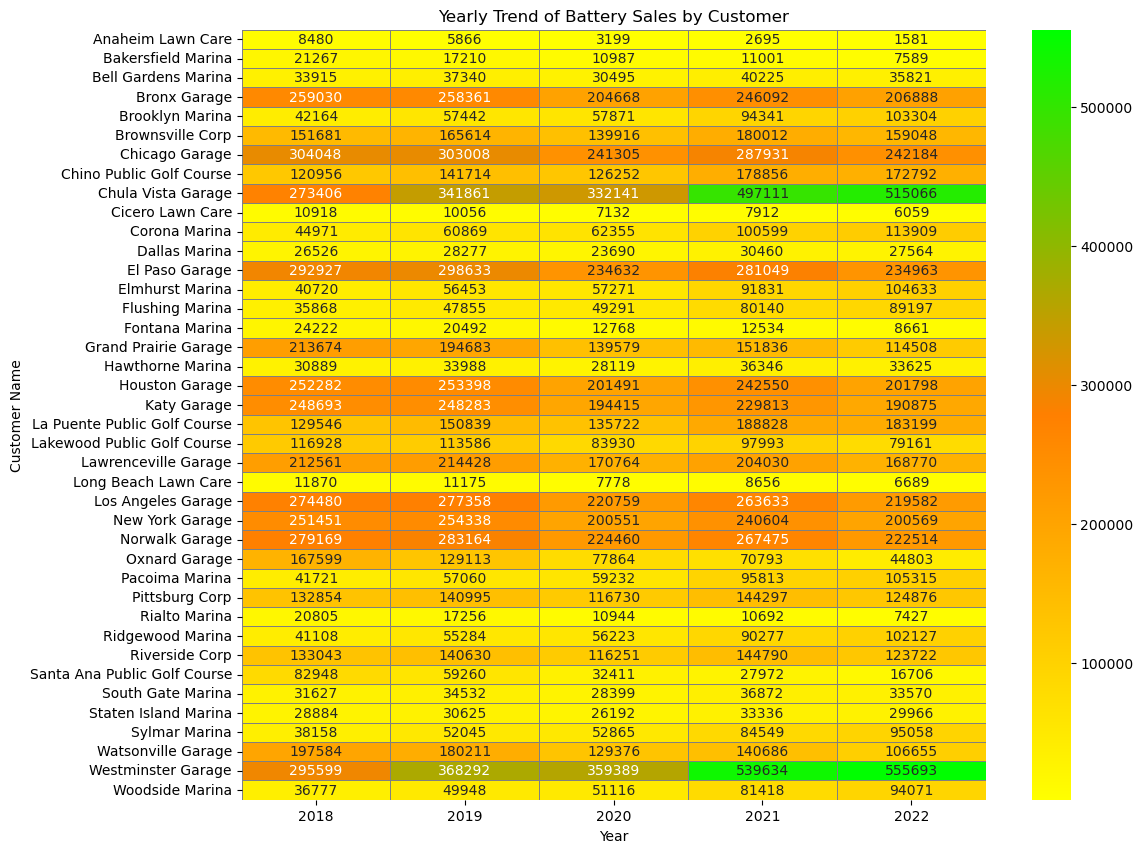

In [17]:
# Customer YoY Trend

# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract year from the 'Date' column
merged_df['Year'] = merged_df['Date'].dt.year

# Group by 'Customer_Name' and 'Year' and sum up 'Battery_Sales'
sales_by_customer_yearly = merged_df.groupby(['Customer_Name', 'Year'])['Battery_Sales'].sum().reset_index()

# Pivot the data to create a heatmap
heatmap_data = sales_by_customer_yearly.pivot(index='Customer_Name', columns='Year', values='Battery_Sales')

# Define custom colormap
colors = [(1, 1, 0), (1, 0.5, 0), (0, 1, 0)]  # Yellow, Orange, Green
cmap_name = 'yellow_orange_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# Plotting the heatmap with custom colormap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap=cm, linewidths=0.5, linecolor='grey', annot=True, fmt=".0f")   # Add grid lines & annotations
## sns.heatmap(heatmap_data, cmap=cm)
plt.title('Yearly Trend of Battery Sales by Customer')
plt.xlabel('Year')
plt.ylabel('Customer Name')
plt.show()

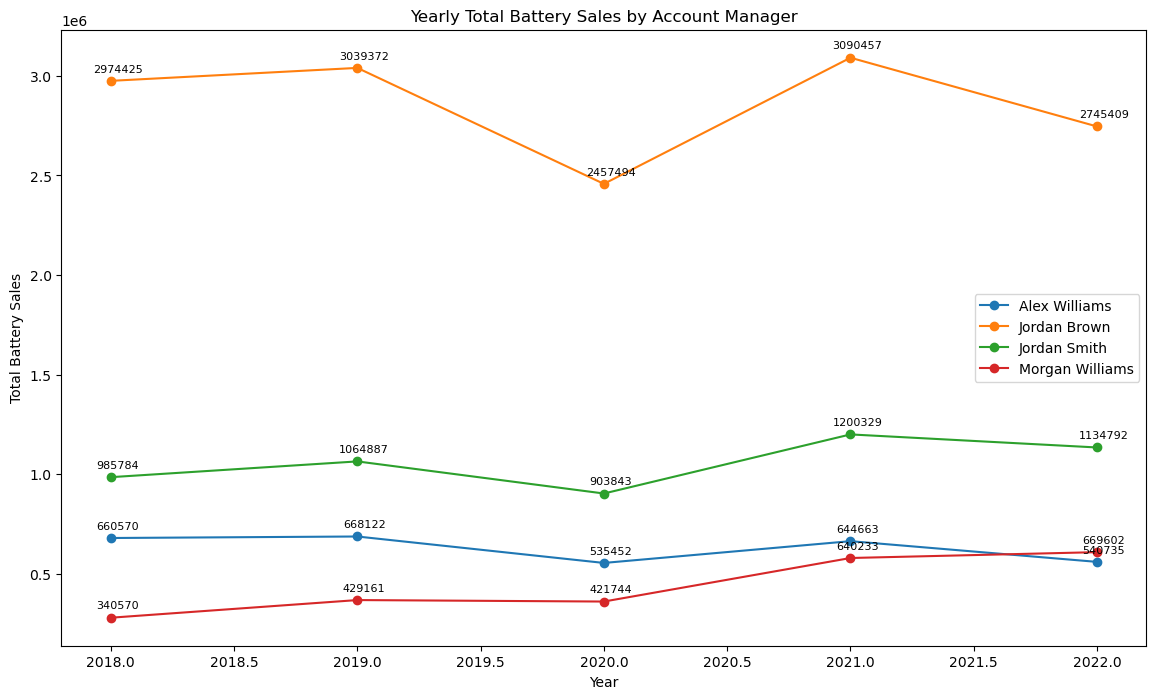

In [18]:
# Account Manager YoY trend

# Group by 'Account_Manager' and 'Year' and sum up 'Battery_Sales'
sales_by_manager_yearly = merged_df.groupby(['Account_Manager', 'Year'])['Battery_Sales'].sum().reset_index()


# Define a dictionary to store offsets for specific account managers
manager_offsets = {'Alex Williams': 20000, 'Morgan Williams': -60000}  # Adjust offset values as needed

# Plotting the line chart with original line markers and no grid lines
plt.figure(figsize=(14, 8))
for idx, manager in enumerate(sales_by_manager_yearly['Account_Manager'].unique()):
  manager_data = sales_by_manager_yearly[sales_by_manager_yearly['Account_Manager'] == manager]
  offset = manager_offsets.get(manager, 0)  # Use 0 offset for other managers
  plt.plot(manager_data['Year'], manager_data['Battery_Sales'] + offset, label=manager, marker='o', linestyle='-')

  # Add annotations
  for i, row in manager_data.iterrows():
    plt.annotate(f"{row['Battery_Sales']}", xy=(row['Year'], row['Battery_Sales'] + offset), xytext=(5, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.title('Yearly Total Battery Sales by Account Manager')
plt.xlabel('Year')
plt.ylabel('Total Battery Sales')
plt.legend()
plt.grid(False)  # Remove grid lines
plt.show()

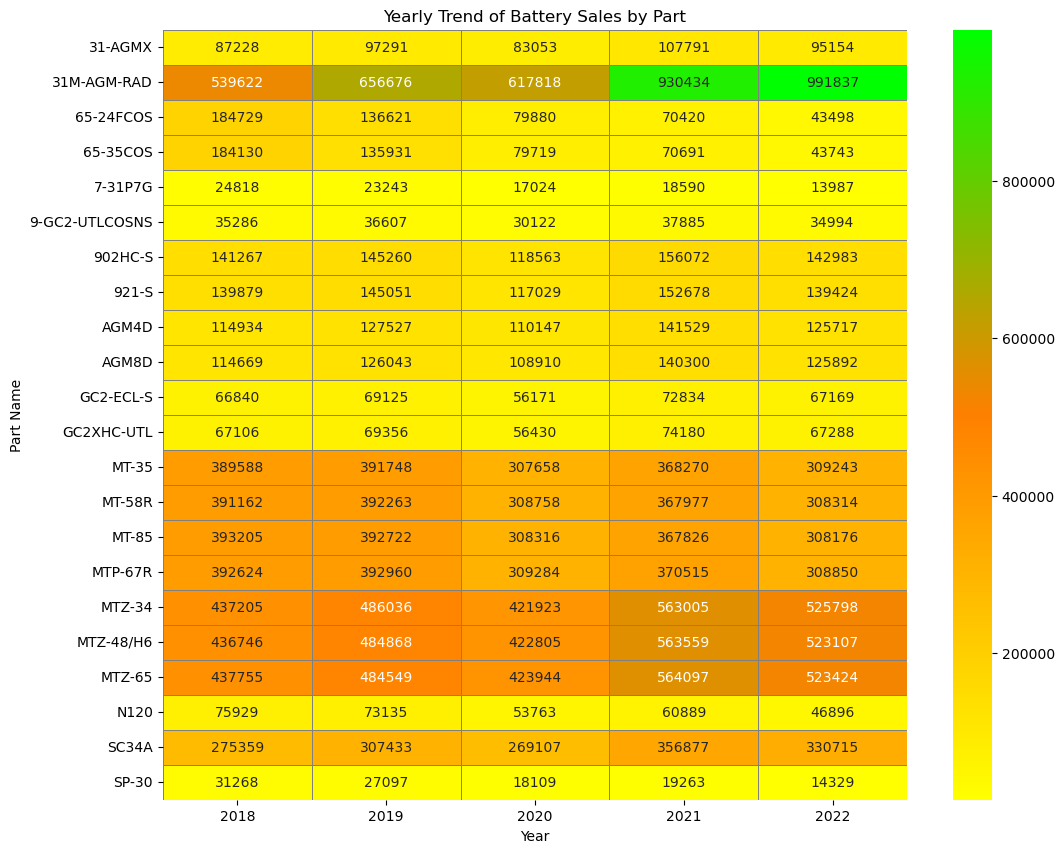

In [19]:
# Product YoY trend

# Group by 'Customer_Name' and 'Year' and sum up 'Battery_Sales'
sales_by_product_yearly = merged_df.groupby(['Product', 'Year'])['Battery_Sales'].sum().reset_index()

# Pivot the data to create a heatmap
heatmap_data = sales_by_product_yearly.pivot(index='Product', columns='Year', values='Battery_Sales')

# Define custom colormap
colors = [(1, 1, 0), (1, 0.5, 0), (0, 1, 0)]  # Yellow, Orange, Green
cmap_name = 'yellow_orange_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# Plotting the heatmap with custom colormap, grid lines, and annotations
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap=cm, linewidths=0.5, linecolor='grey', annot=True, fmt=".0f")  # Add annotations
plt.title('Yearly Trend of Battery Sales by Part')
plt.xlabel('Year')
plt.ylabel('Part Name')
plt.show()

In [20]:
# Duplicate Dataset
merged_df1 = merged_df

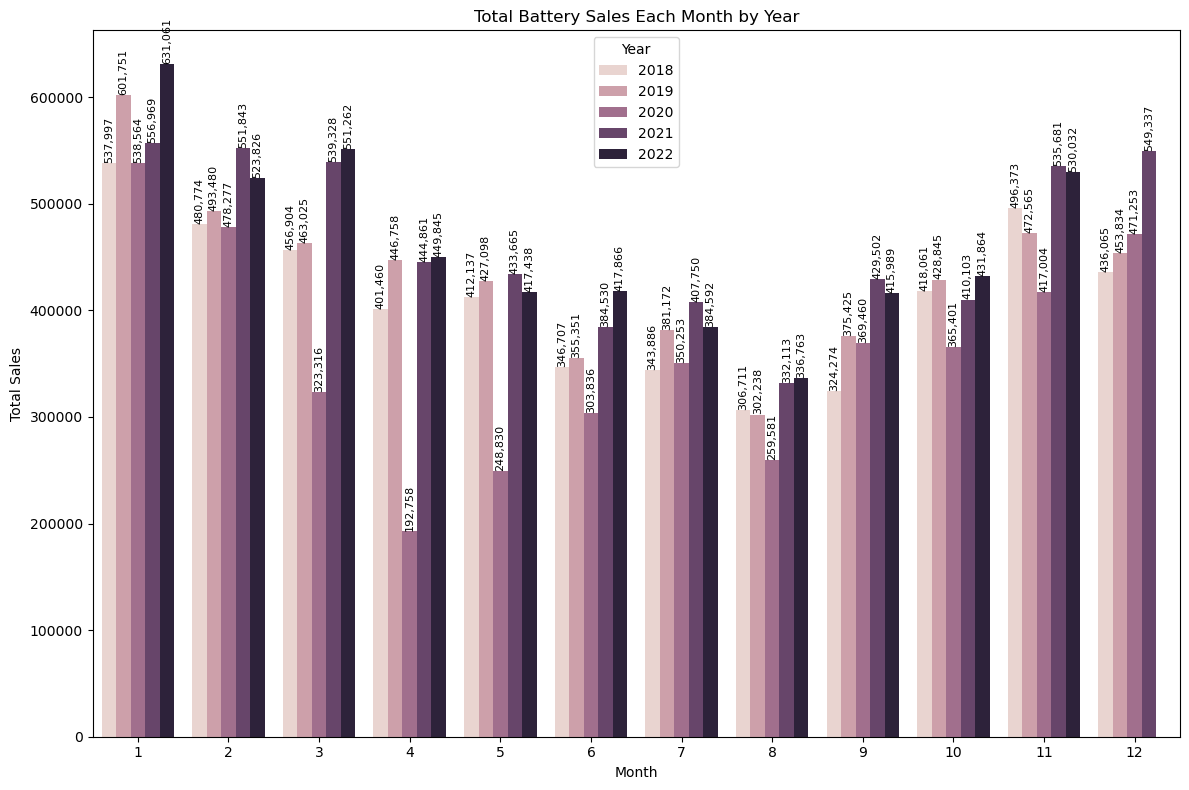

In [21]:
# Convert 'Date' column to datetime type if it's not already
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Extract year and month from the 'Date' column
merged_df1['Year'] = merged_df1['Date'].dt.year
merged_df1['Month'] = merged_df1['Date'].dt.month

# Group by year and month, and calculate total sales
monthly_sales = merged_df1.groupby(['Year', 'Month'])['Battery_Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Create a clustered bar chart using Seaborn
sns.barplot(x='Month', y='Battery_Sales', hue='Year', data=monthly_sales)

# Add total battery sales on the bars
for i, container in enumerate(plt.gca().containers):
    # Get y data for each container
    y_data = container.patches
    
    for j, patch in enumerate(y_data):
        # Get total sales value based on year and month (i+1 for month index)
        year = monthly_sales['Year'].unique()[i]
        month = j + 1
        y_value = monthly_sales.loc[(monthly_sales['Year'] == year) & (monthly_sales['Month'] == month), 'Battery_Sales'].values
        
        # Add text label with some vertical offset
        plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 50, f"{y_value[0]:,}",
                 ha='center', va='bottom', fontsize=8, rotation=90)  # Rotate text label by 90 degrees

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Battery Sales Each Month by Year')

# Show the plot
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### 2022 is missing sales figures for December.

# Now that I know how the data flows, I want to know what the responsibility is by account manager.

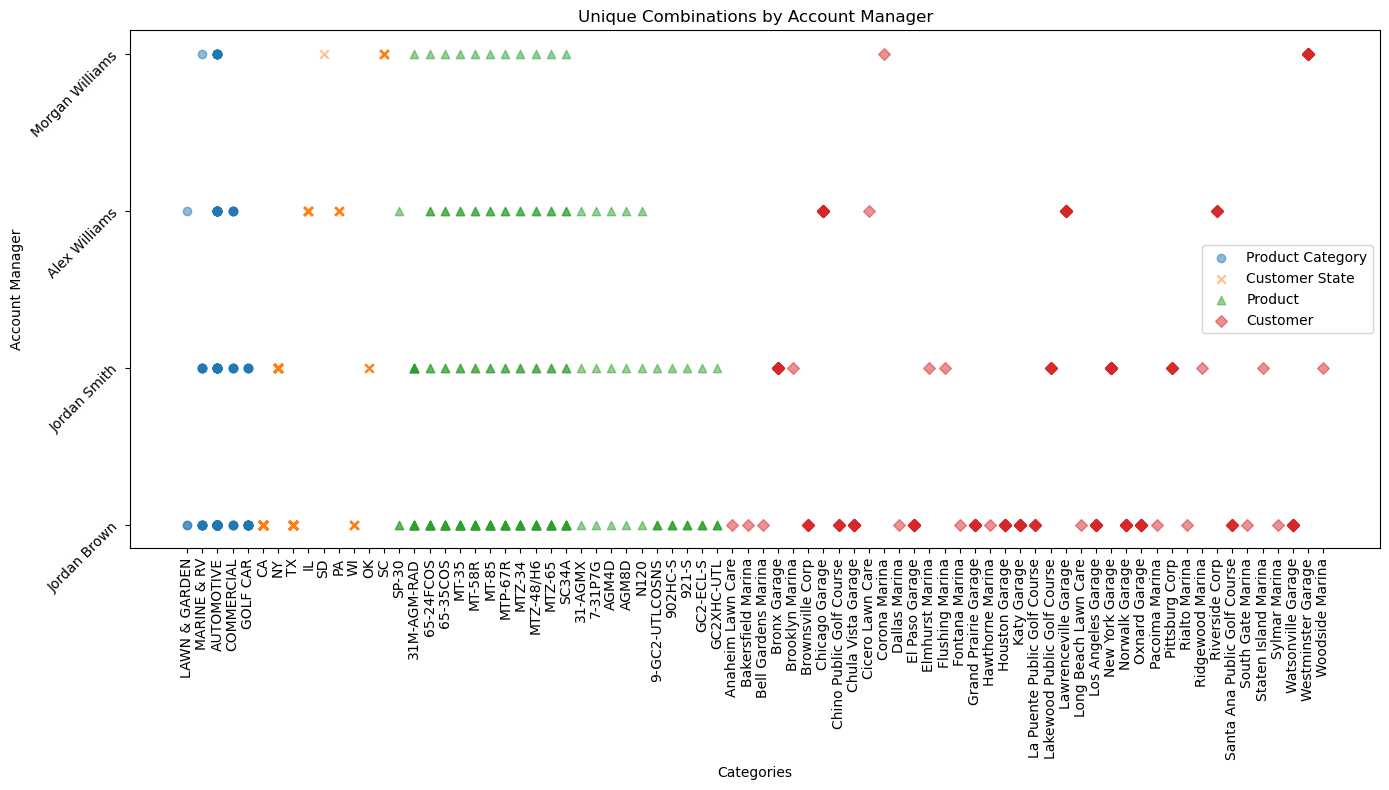

In [22]:
# Drop duplicates to get unique combinations
unique_records = merged_df.drop_duplicates(subset=['Account_Manager', 'Product_Category', 'Customer_Name', 'Customer_State', 'Product', 'AGM_Product'])

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(unique_records['Product_Category'], unique_records['Account_Manager'], label='Product Category', marker='o', alpha=0.5)
plt.scatter(unique_records['Customer_State'], unique_records['Account_Manager'], label='Customer State', marker='x', alpha=0.5)
plt.scatter(unique_records['Product'], unique_records['Account_Manager'], label='Product', marker='^', alpha=0.5)
plt.scatter(unique_records['Customer_Name'], unique_records['Account_Manager'], label='Customer', marker='D', alpha=0.5)
plt.ylabel('Account Manager')
plt.xlabel('Categories')
plt.title('Unique Combinations by Account Manager')
plt.legend()
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

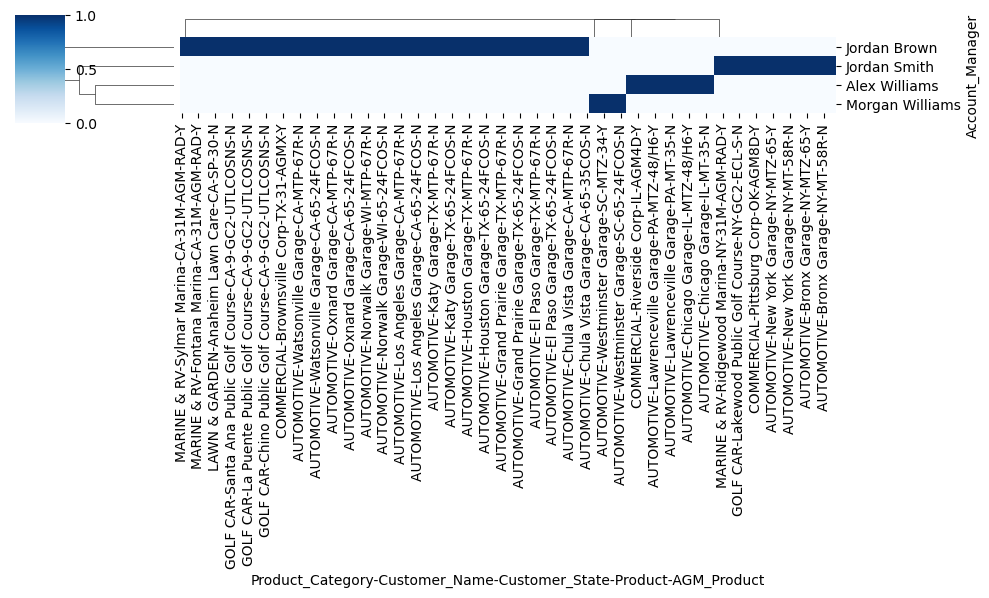

In [23]:
# Select only the desired columns
unique_records1 = merged_df[['Account_Manager', 'Product_Category', 'Customer_Name', 'Customer_State', 'Product', 'AGM_Product']]

# Drop duplicates to get unique combinations
unique_records1 = unique_records1.drop_duplicates()

# Pivot the data to create a hierarchical clustering heatmap
pivot_table = unique_records1.pivot_table(index='Account_Manager', columns=['Product_Category', 'Customer_Name', 'Customer_State', 'Product', 'AGM_Product'], aggfunc=len, fill_value=0)

# Create the hierarchical clustering heatmap
plt.figure(figsize=(10, 6))
sns.clustermap(pivot_table, cmap='Blues', figsize=(10, 6))
plt.show()

# Total Sales by product category

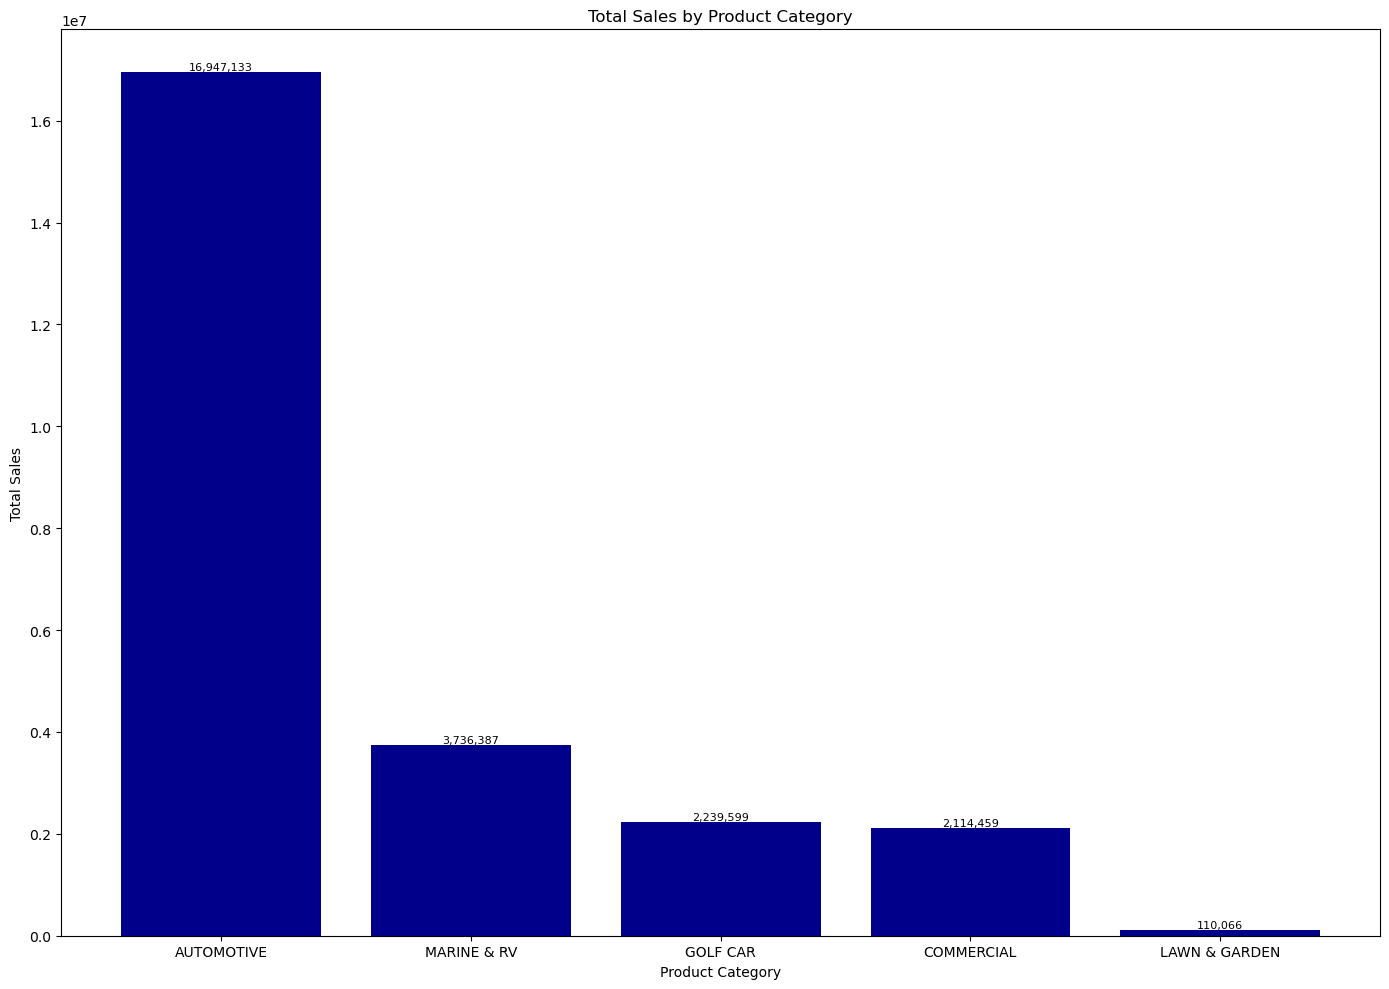

In [24]:
# Assuming 'Product_Category' is the x-axis and 'Battery_Sales' (summed) is the y-axis
product_categories = merged_df['Product_Category'].unique()  # Get unique categories
total_sales1 = merged_df.groupby('Product_Category')['Battery_Sales'].sum()  # Get total sales per category

# Sort product categories based on total sales
total_sales1 = total_sales1.sort_values(ascending=False)
product_categories = total_sales1.index

# Create a bar chart with darker blue color and no gridlines
plt.figure(figsize=(14, 10))  # Adjust figure size as needed
plt.bar(product_categories, total_sales1, color='darkblue')  # Set bar color (no edgecolor)

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')

# Rotate x-axis labels for better readability if needed (consider number of categories)
# plt.xticks(rotation=45)  # Uncomment if needed

# Add data labels above bars (optional)
for i, value in enumerate(total_sales1):
  plt.text(i, value + 50, f"{value:,}", ha='center', va='bottom', fontsize=8)  # Use comma separator for readability

# Remove gridlines on both x and y axes
plt.grid(visible=False)  # This removes gridlines on both axes

# Show the plot
plt.tight_layout()  # Adjust spacing for better readability
plt.show()

#  Pie chart of sales distribution by account manager

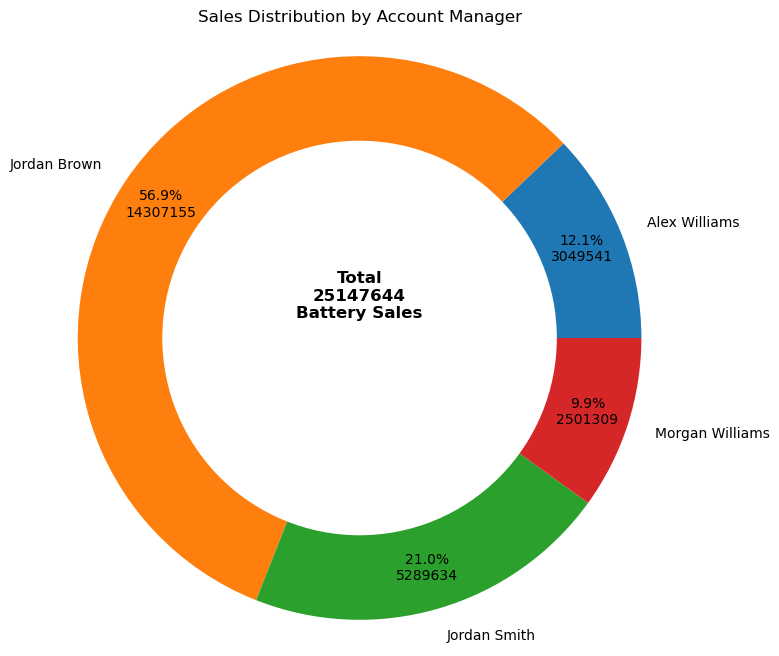

In [25]:
# Calculate total battery sales and number of batteries sold by each Account_Manager
total_sales = merged_df['Battery_Sales'].sum()
sales_by_manager = merged_df.groupby('Account_Manager')['Battery_Sales'].sum()
battery_count_by_manager = merged_df.groupby('Account_Manager')['Battery_Sales'].count()

# Create a pie chart with a hole in the middle
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sales_by_manager, labels=sales_by_manager.index, autopct=lambda pct: f'{pct:.1f}%\n{int(pct/100*total_sales)}', pctdistance=0.85, wedgeprops=dict(width=0.4), textprops=dict(color="black"))

# Add a circle in the middle to create a hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add total sales and battery count in the center
plt.text(0, 0.15, f'Total\n{total_sales}\nBattery Sales', ha='center', va='center', fontsize=12, fontweight='bold')

# Set title
plt.title('Sales Distribution by Account Manager')

# Hide axis limits
plt.axis('off')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

# Check YoY and MoM changes

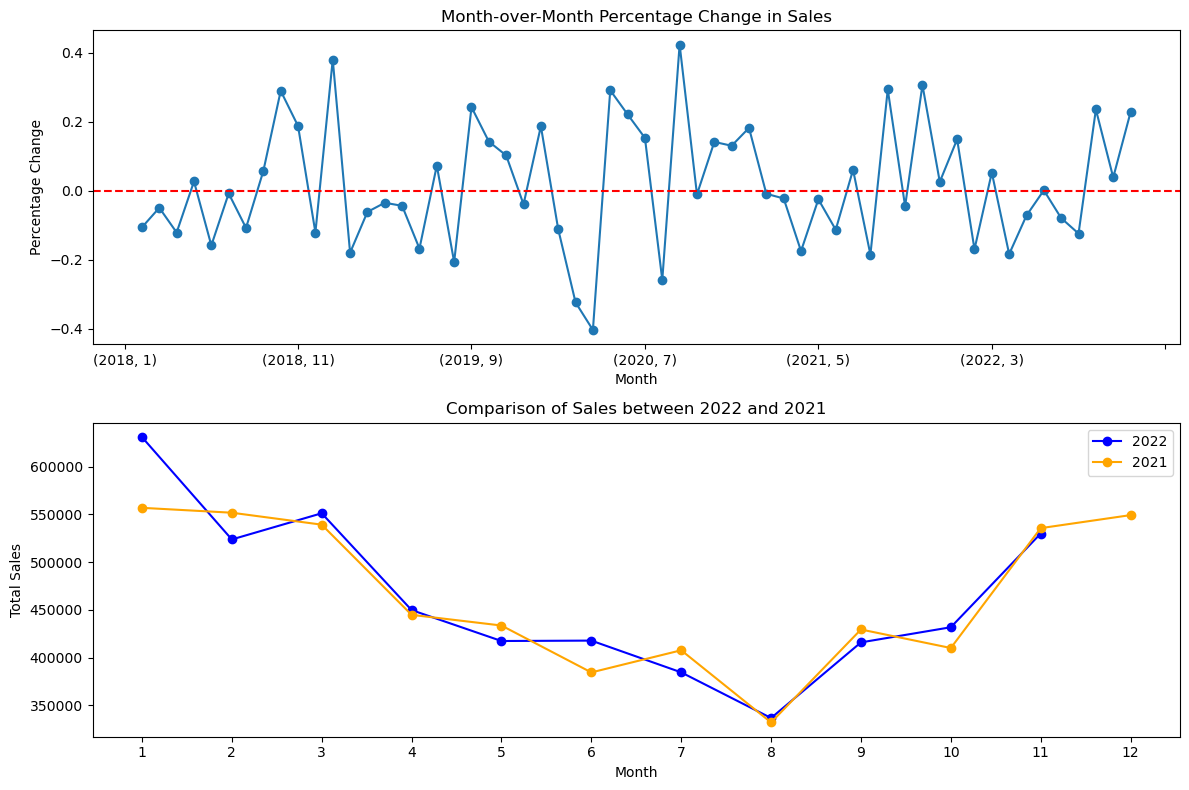

Number of months with decrease in sales: 31
Number of months with increase in sales: 27


In [26]:
# Group by year and month, and calculate total sales
monthly_sales = merged_df1.groupby(['Year', 'Month'])['Battery_Sales'].sum()

# Calculate month-over-month percentage change
mom_change = monthly_sales.pct_change()

# Count the number of months where percentage change is less than zero and more than zero
decrease_count = (mom_change < 0).sum()
increase_count = (mom_change > 0).sum()

# Filter data for the current year and the previous year
current_year = 2022  
previous_year = current_year - 1

current_year_sales = monthly_sales.loc[current_year]
previous_year_sales = monthly_sales.loc[previous_year]

# Plotting
plt.figure(figsize=(12, 8))

# Month-over-month change
plt.subplot(2, 1, 1)
mom_change.plot(marker='o')
plt.title('Month-over-Month Percentage Change in Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change')

# Add red line along zero axis for Month-over-Month Percentage Change
plt.axhline(0, color='red', linestyle='--')

# Comparison between this month and the same month last year
plt.subplot(2, 1, 2)
plt.plot(current_year_sales, marker='o', label=str(current_year), color='blue')
plt.plot(previous_year_sales, marker='o', label=str(previous_year), color='orange')
plt.title('Comparison of Sales between {} and {}'.format(current_year, previous_year))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)

plt.tight_layout()
plt.grid(False)  # Remove grid lines
plt.show()

print("Number of months with decrease in sales:", decrease_count)
print("Number of months with increase in sales:", increase_count)


# Monthly time series showing sales trend over time

In [27]:
# Convert Date column to datetime type
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Set the Date column as the index
merged_df1.set_index('Date', inplace=True)

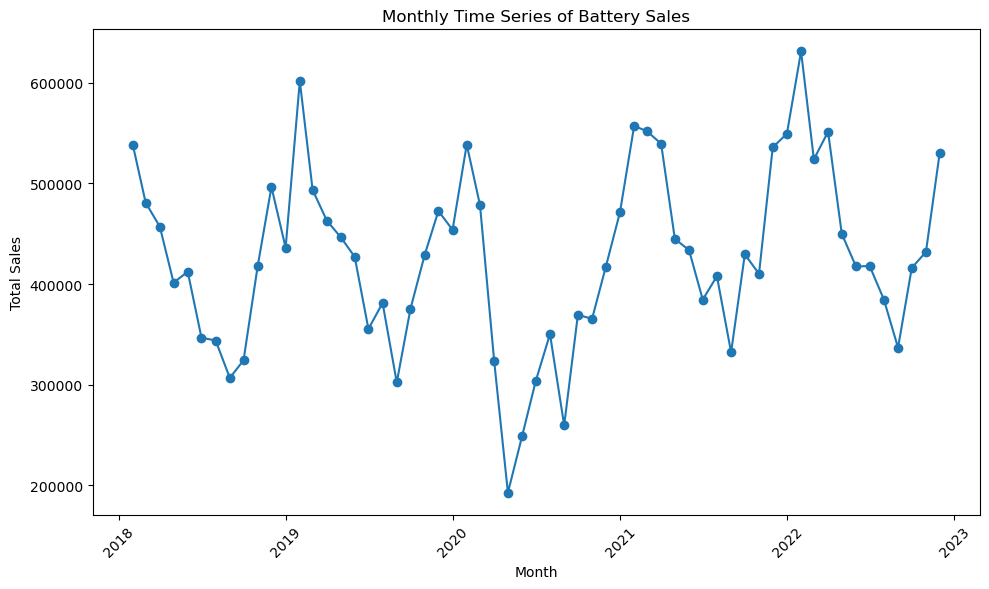

In [28]:
# Resample the data to monthly frequency and sum the sales
monthly_sales = merged_df1.resample('M')['Battery_Sales'].sum()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Time Series of Battery Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.grid(False)  # Remove grid lines
plt.show()

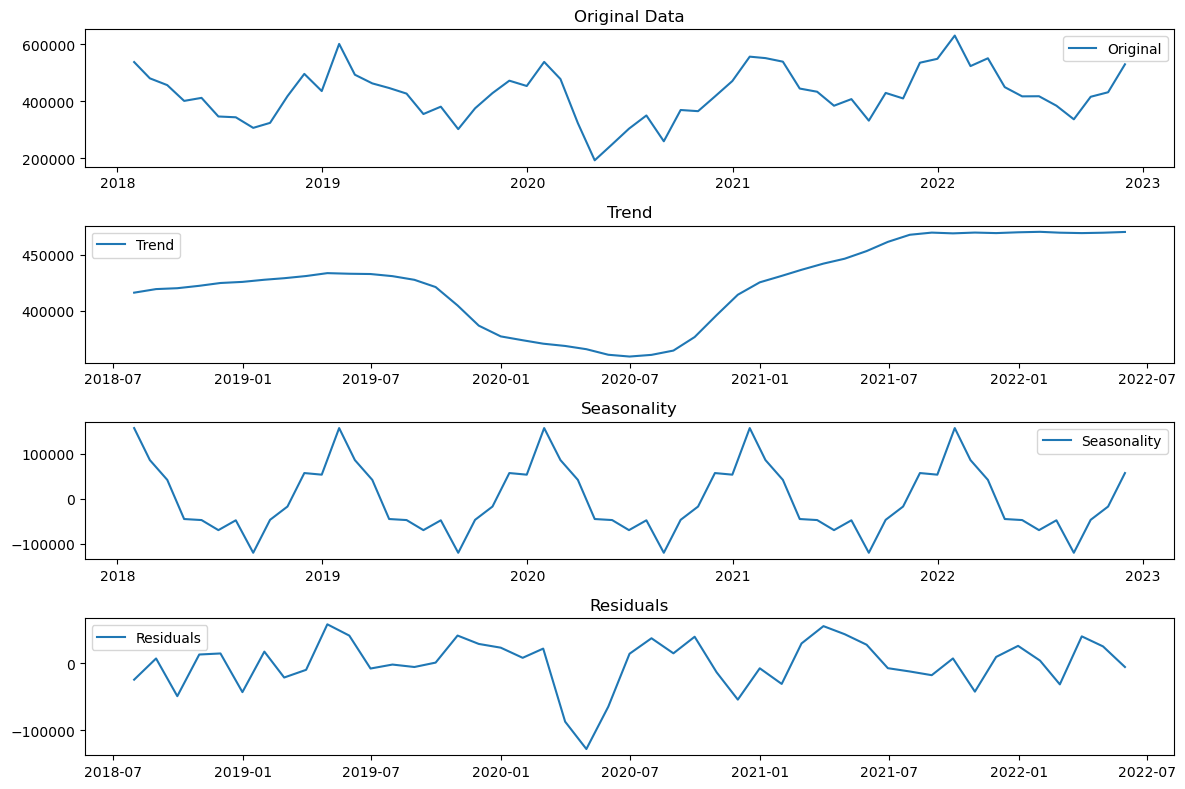

In [29]:
# Seasonal decomposition model for December battery sales

from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the data to monthly frequency
monthly_sales = merged_df1['Battery_Sales'].resample('M').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [30]:
# ARIMA forecasting model for December battery sales

from statsmodels.tsa.arima.model import ARIMA

# Resample the data to monthly frequency
monthly_sales = merged_df1['Battery_Sales'].resample('M').sum()

# Train ARIMA model
model = ARIMA(monthly_sales, order=(5,1,0))  
model_fit = model.fit()

# Forecast missing values for December 2022
forecast = model_fit.forecast(steps=1)  # Forecast one step ahead
forecasted_value = forecast[0]

print("Forecasted value for December 2022:", forecasted_value)

Forecasted value for December 2022: 523973.40863877296


In [31]:
# Imputation for December battery sales

# Filter the dataset to get only December values
december_data = merged_df1[merged_df1['Month'] == 12]

# Group by year and calculate the total sales for each December
december_sales_by_year = december_data.groupby('Year')['Battery_Sales'].sum()

# Calculate the average December sales for the last four years
average_december_sales = december_sales_by_year.tail(4).mean()

# Impute the missing value for December 2022
imputed_value = average_december_sales

print("Imputed value for December 2022:", imputed_value)

Imputed value for December 2022: 477622.25
